# **Notebook resources**

In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import os

In [3]:
datasets_folder = '/content/drive/MyDrive/Kschool_TFM/datasets'

In [4]:
df = pd.read_csv(f'{datasets_folder}{os.sep}dataset-01-merged.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Features cleaning**

In [5]:
df.shape

(37707, 21)

In [6]:
df.columns

Index(['id', 'propertyType', 'title', 'price', 'size', 'hasParking',
       'roomNumber', 'bathNumber', 'hasSwimmingPool', 'hasTerrace',
       'hasGarden', 'hasLift', 'hasAirco', 'isGoodCondition',
       'isNeedsRenovating', 'isNewDevelopment', 'energyCertification',
       'heatingType', 'floor', 'district', 'dataset'],
      dtype='object')

In [7]:
df.dtypes

id                      int64
propertyType           object
title                  object
price                   int64
size                    int64
hasParking             object
roomNumber              int64
bathNumber              int64
hasSwimmingPool         int64
hasTerrace              int64
hasGarden               int64
hasLift                object
hasAirco                int64
isGoodCondition         int64
isNeedsRenovating       int64
isNewDevelopment       object
energyCertification    object
heatingType            object
floor                  object
district               object
dataset                object
dtype: object

In [8]:
df['id'] = df['id'].astype(str)

In [9]:
df.sample(20)

,id,propertyType,title,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,...,hasLift,hasAirco,isGoodCondition,isNeedsRenovating,isNewDevelopment,energyCertification,heatingType,floor,district,dataset
6273,99738165,piso,piso en venta en calle de francisco silvela,1100000,220,1,6,2,0,0,...,1,0,1,0,0,inProcess,no info,planta 4ª,Barrio de Salamanca,idealista
18918,98690085,piso,piso en venta en ciudad jardín,455000,92,1,2,1,0,0,...,1,1,1,0,0,inProcess,Calefacción individual,planta 3ª,Chamartín,idealista
10890,100068909,piso,piso en venta en calle de san claudio,112000,63,0,3,1,0,1,...,1,0,1,0,0,e,no info,planta 2ª,Puente de Vallecas,idealista
8148,98226556,piso,piso en venta en calle de los robles s/n,235000,43,1,1,1,1,1,...,1,0,0,0,1,unknown,no info,planta 2ª,Puente de Vallecas,idealista
37476,164764472,Flat,Piso en venta en Muela de San Juan,155000,52,NaN,2,1,0,0,...,NaN,1,1,0,False,G,Gas Natural,6,Villa de Vallecas,fotocasa
636,86514029,piso,piso en venta en chueca-justicia,949000,154,0,5,5,0,0,...,1,1,1,0,0,inProcess,Calefacción individual: Gas natural,planta 1ª,Centro,idealista
12679,97393492,piso,"piso en venta en av. de la reina victoria, 58",550000,100,0,3,3,0,1,...,1,0,1,0,0,d,Calefacción individual,planta 5ª,Moncloa,idealista
26102,100098790,piso,piso en venta en calle soto hidalgo,448000,121,1,4,2,1,1,...,1,0,0,1,0,inProcess,Calefacción individual: Gas natural,planta 6ª,Barajas,idealista
23,96132173,piso,piso en venta en calle de los caídos de la div...,870000,204,1,3,3,1,0,...,1,1,1,0,0,unknown,Calefacción central: Gas,planta 2ª,Chamartín,idealista
34644,165584715,Flat,Piso en venta en Calle de Villarramiel,105000,65,NaN,2,1,0,0,...,NaN,1,1,0,False,G,Electricidad,5,Villaverde,fotocasa


## **Feature cleaning: binary features**

In [10]:
# All these columns must be 1 or 0
cols_to_clean = ['hasParking','hasSwimmingPool','hasTerrace','hasGarden','hasLift','hasAirco','isGoodCondition','isNeedsRenovating','isNewDevelopment']
for col in cols_to_clean:
  print(col)
  print(df[col].unique())

hasParking
['0' '1' nan 'FEATURES.PARKING_PRIVATE' 'FEATURES.PARKING_COMMUNITY']
hasSwimmingPool
[0 1]
hasTerrace
[0 1]
hasGarden
[0 1]
hasLift
['0' '1' 'YES' nan]
hasAirco
[0 1]
isGoodCondition
[1 0]
isNeedsRenovating
[0 1]
isNewDevelopment
['0' '1' 'False' False]


In [11]:
df['hasParking'] = df['hasParking'].fillna('0').astype(str).str.replace('FEATURES.PARKING_PRIVATE|FEATURES.PARKING_COMMUNITY','1').astype(int)
df['hasLift'] = df['hasLift'].fillna('0').astype(str).str.replace('YES','1').astype(int)
df['isNewDevelopment'] = df['isNewDevelopment'].astype(str).str.replace('False','0').astype(int)

<ipython-input-11-43e7c60ba7d8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['hasParking'] = df['hasParking'].fillna('0').astype(str).str.replace('FEATURES.PARKING_PRIVATE|FEATURES.PARKING_COMMUNITY','1').astype(int)


In [12]:
# All these columns must be 1 or 0
cols_to_clean = ['hasParking','hasSwimmingPool','hasTerrace','hasGarden','hasLift','hasAirco','isGoodCondition','isNeedsRenovating','isNewDevelopment']
for col in cols_to_clean:
  print(col)
  print(df[col].unique())

hasParking
[0 1]
hasSwimmingPool
[0 1]
hasTerrace
[0 1]
hasGarden
[0 1]
hasLift
[0 1]
hasAirco
[0 1]
isGoodCondition
[1 0]
isNeedsRenovating
[0 1]
isNewDevelopment
[0 1]


## **Feature cleaning: floor**

In [ ]:
df['floor'].unique()

array(['no info', 'planta 3ª', 'planta 1ª', 'bajo', 'planta 5ª',
       'planta 4ª', 'planta 8ª', 'planta 9ª', 'does not apply',
       'planta 2ª', 'planta 6ª', 'planta 14ª', 'planta 7ª', 'planta 10ª',
       'entreplanta', 'semi-sótano', 'planta 12ª', 'planta -1',
       'planta 15ª', 'planta 20ª', 'sótano', 'planta 13ª', 'planta 11ª',
       'planta 16ª', 'planta 19ª', 'planta 18ª', 'planta 17ª',
       'planta -2', 'planta 40ª', 'planta 26ª', 'planta 21ª', '0', '7',
       '10', '8', '3', '11', '12', '6', '9', '15', '14', '2', '13', '5',
       '16', '4', '17', '18', '19', '20', '21', '1', 6, 10, 0, 7, 9, 8,
       11, 3, 12, 13, 5, 15, 14, 1, 16, 2, 4, 17, 18, 19, 21, 20],
      dtype=object)

In [ ]:
df['floor'] = df['floor'].astype(str)

In [ ]:
# We only need the floor number
df.loc[df['floor'].str.contains('sótano|sotano|semi-sótano|entreplanta', regex=True),'floor'] = '-1'
df.loc[:,'floor'] = df['floor'].str.replace(r'planta|ª| ','', regex=True)
df.loc[df['floor'] == 'bajo','floor'] = '0'

In [ ]:
df['floor'].unique()

array(['noinfo', '3', '1', '0', '5', '4', '8', '9', 'doesnotapply', '2',
       '6', '14', '7', '10', '-1', '12', '15', '20', '13', '11', '16',
       '19', '18', '17', '-2', '40', '26', '21'], dtype=object)

In [ ]:
df.loc[df['floor'].str.contains('doesnotapply|noinfo'),['propertyType','floor','dataset']].value_counts()

propertyType  floor         dataset  
piso          noinfo        idealista    1359
chalet        doesnotapply  idealista    1179
loft          noinfo        idealista       5
casa rural    doesnotapply  idealista       2
dtype: int64

All the records that have a donotapply value in the floor attribute are either Chalets or Country houses. We can assign a floor 0 to them.

In [ ]:
df.loc[df['floor']=='doesnotapply','floor'] = '0'

In [ ]:
df['floor'].unique()

array(['noinfo', '3', '1', '0', '5', '4', '8', '9', '2', '6', '14', '7',
       '10', '-1', '12', '15', '20', '13', '11', '16', '19', '18', '17',
       '-2', '40', '26', '21'], dtype=object)

In [ ]:
df.loc[df['floor']=='noinfo',['propertyType']].value_counts()

propertyType
piso            1359
loft               5
dtype: int64

There is a minor amount of pisos without floor info. We can just drop them to have this feature at 100%.

In [ ]:
df = df[df['floor']!='noinfo']

## **Feature cleaning: propertyType**

In [ ]:
df['propertyType'].unique()

array(['piso', 'chalet', 'loft', 'atico', 'casa rural', 'Flat'],
      dtype=object)

Flat and piso are the same thing

In [ ]:
df.loc[df['propertyType'] == 'Flat', 'propertyType'] = 'piso'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


The title usually indicates, and begin with, the property type

In [ ]:
df['title']

1                       ático en venta en salsipuedes
2          piso en venta en avenida del general perón
3                   piso en venta en alameda de osuna
4                                piso en venta en sol
5               piso en venta en malasaña-universidad
                             ...                     
37702           Piso en venta en Calle de Embajadores
37703    Casa adosada en venta en Calle de la Toronga
37704                                   Piso en venta
37705                                   Piso en venta
37706                    Piso en venta en C/ Rocafort
Name: title, Length: 36343, dtype: object

Let's check if propertyType matches the property title

In [ ]:
df['propertyTypeTitle'] = df['title'].apply(lambda x: x.lower().split()[0])
df['propertyTypeTitle'].unique()

array(['ático', 'piso', 'chalet', 'estudio', 'dúplex', 'casa', 'finca',
       'apartamento', 'planta', 'loft'], dtype=object)

In [ ]:
df[['propertyType','propertyTypeTitle']].value_counts()

propertyType  propertyTypeTitle
piso          piso                 31124
              ático                 1377
              dúplex                1078
              estudio                673
chalet        chalet                 651
              casa                   528
piso          casa                   324
              apartamento            305
              planta                 124
              loft                    79
loft          estudio                 39
              dúplex                  19
atico         piso                    11
loft          piso                     6
casa rural    finca                    2
piso          finca                    2
loft          ático                    1
dtype: int64

In [ ]:
df['propertyTypeTitle'] = df['propertyTypeTitle'].str.replace('casa','chalet')
df['propertyTypeTitle'] = df['propertyTypeTitle'].str.replace('apartamento','piso')
df['propertyTypeTitle'] = df['propertyTypeTitle'].str.replace('ático','atico')
df['propertyTypeTitle'] = df['propertyTypeTitle'].str.replace('dúplex','duplex')
df['propertyTypeTitle'] = df['propertyTypeTitle'].str.replace('finca','casa rural')
df[['propertyType','propertyTypeTitle']].value_counts()

propertyType  propertyTypeTitle
piso          piso                 31429
              atico                 1377
chalet        chalet                1179
piso          duplex                1078
              estudio                673
              chalet                 324
              planta                 124
              loft                    79
loft          estudio                 39
              duplex                  19
atico         piso                    11
loft          piso                     6
casa rural    casa rural               2
piso          casa rural               2
loft          atico                    1
dtype: int64

In [ ]:
df.loc[df['propertyTypeTitle']=='planta',['title','id','dataset','floor']]

,title,id,dataset,floor
26555,Planta baja en venta en Calle de la Cuesta,162829071,fotocasa,0
26666,Planta baja en venta en Calle Galeón,164410520,fotocasa,3
26921,Planta baja en venta en San Filemon,164913260,fotocasa,0
26947,Planta baja en venta en Villaverde a Vallecas,164885794,fotocasa,0
27340,Planta baja en venta,162550956,fotocasa,0
...,...,...,...,...
36892,Planta baja en venta en La Chopera,176363374,fotocasa,0
37234,Planta baja en venta en Calle de Ventura Rodrí...,176330753,fotocasa,0
37295,Planta baja en venta en Palomares,176342882,fotocasa,0
37422,Planta baja en venta en Calle Galeón,164410520,fotocasa,3


"Planta baja" means ground floor. This means two things:
- we are talking about a flat, as if it were anything else there would be no need to specify the floor in the title
- that the floor feature should be equal to 0

In [ ]:
df.loc[df['propertyTypeTitle']=='planta','floor'] = '0'
df.loc[df['propertyTypeTitle']=='planta','propertyTypeTitle'] = 'piso'

In [ ]:
df[['propertyType','propertyTypeTitle']].value_counts()

propertyType  propertyTypeTitle
piso          piso                 31553
              atico                 1377
chalet        chalet                1179
piso          duplex                1078
              estudio                673
              chalet                 324
              loft                    79
loft          estudio                 39
              duplex                  19
atico         piso                    11
loft          piso                     6
casa rural    casa rural               2
piso          casa rural               2
loft          atico                    1
dtype: int64

In [ ]:
df.loc[(df['propertyTypeTitle']=='casa rural') & (df['propertyType']=='piso')]

,id,propertyType,title,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,...,hasAirco,isGoodCondition,isNeedsRenovating,isNewDevelopment,energyCertification,heatingType,floor,district,dataset,propertyTypeTitle
32123,164990482,piso,Finca rústica en venta en Avenida de la Albufera,469000,370,0,3,1,0,1,...,0,1,0,0,G,NaN,0,Puente de Vallecas,fotocasa,casa rural
33910,164990482,piso,Finca rústica en venta en Avenida de la Albufera,453000,370,0,3,1,0,1,...,0,1,0,0,G,NaN,0,Puente de Vallecas,fotocasa,casa rural


Checking the description of the property, it looks like this one is a building with both a space to open a shop on the ground floor and a proper house to live in on the 1st floor. Let's drop this since offices and business properties are out of our scope.

In [ ]:
df = df[df['id']!='164990482']
df[['propertyType','propertyTypeTitle']].value_counts()

propertyType  propertyTypeTitle
piso          piso                 31553
              atico                 1377
chalet        chalet                1179
piso          duplex                1078
              estudio                673
              chalet                 323
              loft                    79
loft          estudio                 39
              duplex                  19
atico         piso                    11
loft          piso                     6
casa rural    casa rural               2
loft          atico                    1
dtype: int64

There are still some discrepancies but the propertyTypeTitle tends to be more trustworthy since it has been extracted from the title. The guess is: the title is what mostly catches the eye of a potential buyer and therefore the advertiser might put a more accurate info in it.

Still, the properties having propertyType set to "loft" and "atico", are the result of the sanity check made at the beginning using Idealista's featureTag, which is something that has to be applied intentionally by the advertiser so it has the same value of the title.

In those specific cases we can see that there are 6 lofts marked in the title as pisos, other 11 aticos marked as pisos and 39 lofts marked as estudio.

In [ ]:
df.loc[(df['propertyType']=='loft') &  (df['propertyTypeTitle']=='piso'),'propertyTypeTitle'] = 'loft'
df.loc[(df['propertyType']=='atico') & (df['propertyTypeTitle']=='piso'),'propertyTypeTitle'] = 'atico'
df.loc[(df['propertyType']=='loft') & (df['propertyTypeTitle']=='estudio'),'propertyTypeTitle'] = 'loft'
df.loc[(df['propertyType']=='loft') & (df['propertyTypeTitle']=='atico'),'propertyTypeTitle'] = 'atico'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df[['propertyType','propertyTypeTitle']].value_counts()

propertyType  propertyTypeTitle
piso          piso                 31553
              atico                 1377
chalet        chalet                1179
piso          duplex                1078
              estudio                673
              chalet                 323
              loft                    79
loft          loft                    45
              duplex                  19
atico         atico                   11
casa rural    casa rural               2
loft          atico                    1
dtype: int64

The feature "propertyTypeTitle" is now more reliable than propertyType itself. Let's update "propertyType" and drop "propertyTypeTitle".

In [ ]:
df['propertyType'] = df['propertyTypeTitle']
df = df.drop('propertyTypeTitle', axis=1)

df['propertyType'].unique()

array(['atico', 'piso', 'chalet', 'estudio', 'duplex', 'loft',
       'casa rural'], dtype=object)

## **Feature cleaning: district**

In [ ]:
df['district'].unique()

array(['Villaverde', 'Tetuán', 'Barajas', 'Centro', 'Carabanchel',
       'Puente de Vallecas', 'Chamartín', 'Barrio de Salamanca',
       'Chamberí', 'Vicálvaro', 'Fuencarral', 'Retiro', 'San Blas',
       'Arganzuela', 'Ciudad Lineal', 'Moncloa', 'Villa de Vallecas',
       'Hortaleza', 'Latina', 'Usera', 'Moratalaz',
       'Fuencarral - El Pardo', 'Moncloa - Aravaca', 'Chamartin'],
      dtype=object)

"Fuencarral" and "Fuencarral - El Pardo" are the same thing, just as much as "Moncloa" and "Moncloa - Aravaca" are the same too. There is also Chamartín with and without accent (Chamartin) representing the same district. We have to clean these little imprecisions.

In [ ]:
df.loc[df['district'] == 'Fuencarral - El Pardo','district'] = 'Fuencarral'
df.loc[df['district'] == 'Moncloa - Aravaca','district'] = 'Moncloa'
df.loc[df['district'] == 'Chamartín','district'] = 'Chamartin'

In [ ]:
df['district'].unique()

array(['Villaverde', 'Tetuán', 'Barajas', 'Centro', 'Carabanchel',
       'Puente de Vallecas', 'Chamartin', 'Barrio de Salamanca',
       'Chamberí', 'Vicálvaro', 'Fuencarral', 'Retiro', 'San Blas',
       'Arganzuela', 'Ciudad Lineal', 'Moncloa', 'Villa de Vallecas',
       'Hortaleza', 'Latina', 'Usera', 'Moratalaz'], dtype=object)

## **Feature cleaning: heatingType**

In [ ]:
df['heatingType'].isna().any()

True

In [ ]:
df['heatingType'] = df['heatingType'].fillna('no info')

In [ ]:
df['heatingType'].unique()

array(['no info', 'Calefacción individual: Gas natural',
       'Calefacción individual: Eléctrica', 'Calefacción central',
       'Calefacción central: Gas', 'Calefacción individual',
       'Calefacción individual: Bomba de frío/calor',
       'No dispone de calefacción', 'Calefacción central: Gasoil',
       'Calefacción individual: Gas propano/butano',
       'Calefacción central: Gas natural', 'Calefacción individual: Gas',
       'Calefacción central: Gas propano/butano',
       'Calefacción individual: Gasoil',
       'Calefacción central: Bomba de frío/calor', 'Gas Natural',
       'Electricidad', 'Gasóleo', 'Solar', 'Propano'], dtype=object)

We can improve the coding of the heating by matching the values of both datasets.

In [ ]:
df.loc[:,'heatingType'] = df['heatingType'].str.lower()
df.loc[:,'heatingType'] = df['heatingType'].str.replace(r'^Calefacci[óo]n.*:.','', regex=True)
df.loc[df['heatingType'].str.contains('no info|no dispone de calefacción|calefacción central|calefacción individual'),'heatingType'] = 'no info/no calefacción'
df.loc[df['heatingType'].str.contains('^propano$', regex = True),'heatingType'] = 'gas propano/butano'
df.loc[df['heatingType'].str.contains('^gas natural$', regex = True),'heatingType'] = 'gas natural'
df.loc[df['heatingType'].str.contains('^gasóleo$', regex = True),'heatingType'] = 'gasoil'
df['heatingType'].unique()

array(['no info/no calefacción', 'gas natural', 'electricidad', 'gasoil',
       'solar', 'gas propano/butano'], dtype=object)

In [ ]:
df['hasHeatingInfo'] = (df['heatingType'] != 'no info/no calefacción').astype(int)
df['hasHeatingInfo']

1        0
2        0
3        0
4        0
5        0
        ..
37702    0
37703    0
37704    0
37705    0
37706    0
Name: hasHeatingInfo, Length: 36340, dtype: int64

In [ ]:
print(df['hasHeatingInfo'].sum())
print(df['hasHeatingInfo'].sum()/df.shape[0])

3437
0.0945789763346175


We have heating information about a very small portion of the dataset (less than 10%).

## **Feature cleaning: energyCertificate**

In [ ]:
df['energyCertification'].unique()

array(['inProcess', 'd', 'g', 'e', 'b', 'c', 'unknown', 'f', 'a',
       'exempt', 'G', 'E', 'F', 'A', 'C', 'B', 'D', '^'], dtype=object)

In [ ]:
df.loc[:,'energyCertification'] = df['energyCertification'].str.replace(r'inProcess|unknown|\^|exempt','no info', regex=True)
df.loc[:,'energyCertification'] = df['energyCertification'].str.upper()

In [ ]:
df['energyCertification'].unique()

array(['NO INFO', 'D', 'G', 'E', 'B', 'C', 'F', 'A'], dtype=object)

In [ ]:
df['energyCertification'].value_counts()

NO INFO    13840
G           8964
E           6364
D           2442
F           1460
C           1401
A           1090
B            779
Name: energyCertification, dtype: int64

In [ ]:
df[df['energyCertification'] == '^']

,id,propertyType,title,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,...,hasAirco,isGoodCondition,isNeedsRenovating,isNewDevelopment,energyCertification,heatingType,floor,district,dataset,hasHeatingInfo


In [ ]:
df.columns

Index(['id', 'propertyType', 'title', 'price', 'size', 'hasParking',
       'roomNumber', 'bathNumber', 'hasSwimmingPool', 'hasTerrace',
       'hasGarden', 'hasLift', 'hasAirco', 'isGoodCondition',
       'isNeedsRenovating', 'isNewDevelopment', 'energyCertification',
       'heatingType', 'floor', 'district', 'dataset', 'hasHeatingInfo'],
      dtype='object')

In [ ]:
df.loc[(df['energyCertification'] == '^') | (df['energyCertification'] == 'unknown'),'energyCertification'] = 'no info'
df['energyCertification'] = df['energyCertification'].str.upper()

In [ ]:
df['energyCertification'].value_counts()

NO INFO    13840
G           8964
E           6364
D           2442
F           1460
C           1401
A           1090
B            779
Name: energyCertification, dtype: int64

There are too many "no info" values for this feature to drop all the related records, still it is too early to just drop the entire column, so we will keep it as is.

## **Cleaning duplicate property**

Let's see if there are some duplicates based on the Idealista's and Fotocasa's own ids.

In [ ]:
duplicates_by_dataset = df[['id','dataset']].value_counts()
duplicates_by_dataset = duplicates_by_dataset[duplicates_by_dataset > 1]
duplicates_by_dataset

id         dataset 
165222612  fotocasa    4
165328358  fotocasa    4
164261418  fotocasa    4
164961686  fotocasa    4
164635290  fotocasa    4
                      ..
164768072  fotocasa    2
176156582  fotocasa    2
165011428  fotocasa    2
165011975  fotocasa    2
164272857  fotocasa    2
Length: 1593, dtype: int64

In [ ]:
duplicates_by_dataset = duplicates_by_dataset.reset_index()
duplicates_by_dataset.columns = ['id','dataset','count']
duplicates_by_dataset

,id,dataset,count
0,165222612,fotocasa,4
1,165328358,fotocasa,4
2,164261418,fotocasa,4
3,164961686,fotocasa,4
4,164635290,fotocasa,4
...,...,...,...
1588,164768072,fotocasa,2
1589,176156582,fotocasa,2
1590,165011428,fotocasa,2
1591,165011975,fotocasa,2


In [ ]:
duplicates_by_dataset['dataset'].unique()

array(['fotocasa'], dtype=object)

In [ ]:
df[df['id']=='164816170']

,id,propertyType,title,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,...,hasAirco,isGoodCondition,isNeedsRenovating,isNewDevelopment,energyCertification,heatingType,floor,district,dataset,hasHeatingInfo
27322,164816170,piso,Piso en venta en Calle de la Serradilla,168800,75,0,3,1,0,1,...,0,0,1,0,G,no info/no calefacción,0,Latina,fotocasa,0
31382,164816170,piso,Piso en venta en Calle de la Serradilla,167000,75,0,3,1,0,1,...,0,0,1,0,G,no info/no calefacción,0,Latina,fotocasa,0
32612,164816170,piso,Piso en venta en Calle de la Serradilla,168000,75,0,3,1,0,1,...,0,0,1,0,G,no info/no calefacción,0,Latina,fotocasa,0
33498,164816170,piso,Piso en venta en Calle de la Serradilla,165000,75,0,3,1,0,1,...,0,0,1,0,G,no info/no calefacción,0,Latina,fotocasa,0


Fotocasa's dataset have some duplicates. This might be due to the fact that properties' details might change, for example the price can be lowered in case the property remains unsold for a while.

This issue might occure because of scraping the same property multiple times.

We should keep the last record for each duplicate property as it will store the most up-to-date info

In [ ]:
print('Records amound before dropping duplicates: ',df.shape[0])
df = df.drop_duplicates(subset=['id'],keep='last')
print('Records amound after dropping duplicates: ',df.shape[0])

Records amound before dropping duplicates:  36340
Records amound after dropping duplicates:  34427


In [ ]:
(df[['id','dataset']].value_counts() > 1).any()

False

There might be more duplicates, which are harder to spot. Those are properties having the same property type, price, size, district and title and can be duplicates as they are uploaded by different real estate agencies. This is a quite common phenomena and should be checked out.

In [ ]:
checking_duplicated_properties = df.groupby(['propertyType','price','size','district'])['id'].apply(list).reset_index()
checking_duplicated_properties['id_count'] = checking_duplicated_properties['id'].apply(len)
checking_duplicated_properties = checking_duplicated_properties[checking_duplicated_properties['id_count']>1].sort_values('id_count',ascending=False)
checking_duplicated_properties

,propertyType,price,size,district,id,id_count
22839,piso,1080000,129,Barrio de Salamanca,"[100111268, 98049627, 98022393, 99348362, 9802...",65
17434,piso,425000,49,Centro,"[98100577, 98059607, 98187628, 98306193, 99829...",46
9849,piso,191000,106,San Blas,"[95912951, 96096366, 97206804, 97524700, 16493...",40
21714,piso,819000,91,Centro,"[98761432, 100118018, 99485754, 98619268, 9980...",36
21991,piso,859000,115,Centro,"[100027873, 97672768, 98094650, 98106782, 9862...",36
...,...,...,...,...,...,...
9988,piso,195000,72,Ciudad Lineal,"[99287542, 99526614]",2
9993,piso,195000,74,Carabanchel,"[99641038, 165654502]",2
9997,piso,195000,75,Villa de Vallecas,"[98577905, 164545302]",2
10001,piso,195000,77,Hortaleza,"[98263237, 165307490]",2


In [ ]:
print(f"Dataset would be reduced by {checking_duplicated_properties['id_count'].sum() - checking_duplicated_properties.shape[0]} total records")

Dataset would be reduced by 9617 total records


In this case, for each property, we will keep the most complete record which will be the one with more characteristics

In [ ]:
df.dtypes

id                     object
propertyType           object
title                  object
price                   int64
size                    int64
hasParking              int64
roomNumber              int64
bathNumber              int64
hasSwimmingPool         int64
hasTerrace              int64
hasGarden               int64
hasLift                 int64
hasAirco                int64
isGoodCondition         int64
isNeedsRenovating       int64
isNewDevelopment        int64
energyCertification    object
heatingType            object
floor                  object
district               object
dataset                object
hasHeatingInfo          int64
dtype: object

In [ ]:
cols_to_sum = [col for col,dtype in df.dtypes.items() if dtype == 'int64' and col not in ['price','size']]

df['temp_score'] = df[cols_to_sum].sum(axis=1)
df['temp_score']

1         5
2        12
3        10
4         6
5         9
         ..
37702     6
37703    11
37704     7
37705     9
37706     5
Name: temp_score, Length: 34427, dtype: int64

In [ ]:
df.sort_values('temp_score',ascending=False)

,id,propertyType,title,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,...,isGoodCondition,isNeedsRenovating,isNewDevelopment,energyCertification,heatingType,floor,district,dataset,hasHeatingInfo,temp_score
36167,176227419,piso,Piso en venta en Calle de Sicilia,715000,109,0,109,0,0,1,...,1,0,0,D,gas natural,8,Puente de Vallecas,fotocasa,1,114
26281,97831813,chalet,chalet adosado en venta en el viso,7800000,882,0,18,14,1,1,...,1,0,0,NO INFO,no info/no calefacción,0,Chamartin,idealista,0,37
5477,97460745,chalet,chalet adosado en venta en calle del tambre,7800000,882,0,18,14,1,1,...,1,0,0,B,no info/no calefacción,0,Chamartin,idealista,0,36
22085,88980097,piso,piso en venta en sol,2300000,443,0,16,16,0,0,...,0,1,0,NO INFO,no info/no calefacción,2,Centro,idealista,0,34
2826,85942106,chalet,casa o chalet independiente en venta en aravaca,2800000,1308,1,16,10,1,1,...,1,0,0,NO INFO,no info/no calefacción,0,Moncloa,idealista,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32359,165165977,piso,Piso en venta,202500,49,0,0,0,0,0,...,1,0,0,G,no info/no calefacción,6,Chamartin,fotocasa,0,1
16742,98129215,piso,piso en venta en zofío,70000,74,0,0,0,0,0,...,0,1,0,F,no info/no calefacción,4,Usera,idealista,0,1
33586,163724757,piso,Piso en venta,115000,86,0,0,0,0,0,...,1,0,0,G,no info/no calefacción,7,Latina,fotocasa,0,1
28631,165244667,piso,Planta baja en venta en Valdecanillas,143000,214,0,0,0,0,0,...,1,0,0,G,no info/no calefacción,0,San Blas,fotocasa,0,1


In [ ]:
df = df.sort_values('temp_score',ascending=False)\
       .drop_duplicates(subset=['propertyType','price','size','district'],keep='first').sort_index()
df.shape

(24810, 23)

In [ ]:
checking_duplicated_properties = df.groupby(['propertyType','price','size','district'])['id'].apply(list).reset_index()
checking_duplicated_properties['id_count'] = checking_duplicated_properties['id'].apply(len)
checking_duplicated_properties.sort_values('id_count',ascending=False)

,propertyType,price,size,district,id,id_count
0,atico,77000,60,Villa de Vallecas,[176219031],1
16571,piso,385000,105,San Blas,[163755909],1
16545,piso,385000,69,Centro,[99821164],1
16544,piso,385000,63,Centro,[100053029],1
16543,piso,385000,63,Barrio de Salamanca,[96776689],1
...,...,...,...,...,...,...
8268,piso,169000,46,Hortaleza,[98407053],1
8267,piso,169000,46,Fuencarral,[98376276],1
8266,piso,169000,45,Barajas,[100082183],1
8265,piso,169000,45,Arganzuela,[97831700],1


On the other hand, we have also detected similar properties with different ids and slightly different prices.

In [ ]:
df_duplicated_titles = pd.DataFrame(df.reset_index().sort_values('price',ascending=False).groupby(by=['title','size','district','temp_score','roomNumber','bathNumber','dataset','floor'])['id'].apply(list).reset_index())
df_duplicated_titles['id_count'] = df_duplicated_titles['id'].apply(len)
df_duplicated_titles = df_duplicated_titles[df_duplicated_titles['id_count'] > 1].sort_values('id_count',ascending=False)
df_duplicated_titles


,title,size,district,temp_score,roomNumber,bathNumber,dataset,floor,id,id_count
6464,chalet adosado en venta en calle julián camari...,203,San Blas,12,4,3,idealista,0,"[100112277, 100112262, 100112261, 100112269, 1...",6
6456,"chalet adosado en venta en calle igualdad, 171",188,Vicálvaro,10,4,3,idealista,0,"[98196383, 98196321, 98143305, 98143279]",4
6391,chalet adosado en venta en calle cerro minguet...,260,Fuencarral,10,3,3,idealista,0,"[97240072, 97240102, 97240112, 97240139]",4
6382,chalet adosado en venta en calle arte figurati...,135,Villa de Vallecas,9,3,3,idealista,0,"[97808854, 97808876, 97808841, 97808818]",4
587,Loft en venta en Barbatain,38,Carabanchel,5,0,1,fotocasa,0,"[165722010, 165736303, 165736300, 165736301]",4
...,...,...,...,...,...,...,...,...,...,...
6652,chalet pareado en venta en calle alcalde pedro...,150,Vicálvaro,12,4,3,idealista,0,"[99395750, 99395766]",2
6643,"chalet pareado en venta en avenida valdemarin, 3",367,Moncloa,13,4,4,idealista,0,"[98292918, 97201204]",2
6641,chalet pareado en venta en avenida del cardena...,422,Fuencarral,14,7,2,idealista,0,"[97589720, 98190544]",2
6569,chalet adosado en venta en orcasitas,81,Usera,7,3,2,idealista,0,"[98137901, 95580901]",2


In [ ]:
print(f'Possible duplicates: {df_duplicated_titles["id_count"].sum()}')

Possible duplicates: 731


Usually this type of properties are actually different but simply having some common characteristics. They usually belong to the same building or complex and are being advertised by the same real estate promoter or agency. There is no way to determine algorithmically whether there are some real duplicates but we tend to deny this hypothesis as it would make little sense to announce the same property with different prices.

Looks like everything is fine now. We can drop temp_score.

In [ ]:
df = df.drop('temp_score', axis=1)

## **Price per m2**

Let's create the price per square meter (price_m2) feature. Of course it will not be used in the model but it will definetly be useful to analyse the dataset

In [ ]:
df['price_m2'] = (df['price'] / df['size']).round(2)

## **Spotting outliers**

In [ ]:
df.isna().any()

id                     False
propertyType           False
title                  False
price                  False
size                   False
hasParking             False
roomNumber             False
bathNumber             False
hasSwimmingPool        False
hasTerrace             False
hasGarden              False
hasLift                False
hasAirco               False
isGoodCondition        False
isNeedsRenovating      False
isNewDevelopment       False
energyCertification    False
heatingType            False
floor                  False
district               False
dataset                False
hasHeatingInfo         False
price_m2                True
dtype: bool

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,24810.0,5.656019e+05,758505.059885,0.0,185000.00,320000.0,630000.00,21000000.0
size,24810.0,1.283374e+02,1179.522793,0.0,64.00,90.0,132.00,185000.0
hasParking,24810.0,3.061266e-01,0.460892,0.0,0.00,0.0,1.00,1.0
roomNumber,24810.0,2.717130e+00,1.551731,0.0,2.00,3.0,3.00,109.0
bathNumber,24810.0,1.821362e+00,1.161689,0.0,1.00,2.0,2.00,21.0
hasSwimmingPool,24810.0,1.735590e-01,0.378737,0.0,0.00,0.0,0.00,1.0
hasTerrace,24810.0,4.000403e-01,0.489916,0.0,0.00,0.0,1.00,1.0
hasGarden,24810.0,1.888755e-01,0.391418,0.0,0.00,0.0,0.00,1.0
hasLift,24810.0,6.862555e-01,0.464023,0.0,0.00,1.0,1.00,1.0
hasAirco,24810.0,5.467553e-01,0.497819,0.0,0.00,1.0,1.00,1.0


Apparently there are houses having no price and/or no size. This must be an error in the data scraping phase and such records have to be dropped.


In [ ]:
len(df[(df['price']==0)])

20

In [ ]:
len(df[(df['size']==0)])

13

In [ ]:
print(df.shape[0])
df = df[(df['size']>0) & (df['price']>0)]
print(df.shape[0])

24810
24779


There are also properties with no rooms and no bathrooms. Those cannot be dropped just like that because they could be studio flats or lofts. They could also be classified as penthouses (áticos) or duplex and studios or lofts at the same time; we just sticked with penthouse or duplex as these are property types that imply that the property has specific caracteristics that help with price prediction.

So we are only interested in properties generically categorized as "piso" (flat) or, even worse, "chalets" and "fincas", but having no bedrooms and 1 or no bathroom.

In [ ]:
piso_chalet_or_finca = df[df['propertyType'].str.contains('piso|chalet|finca')]

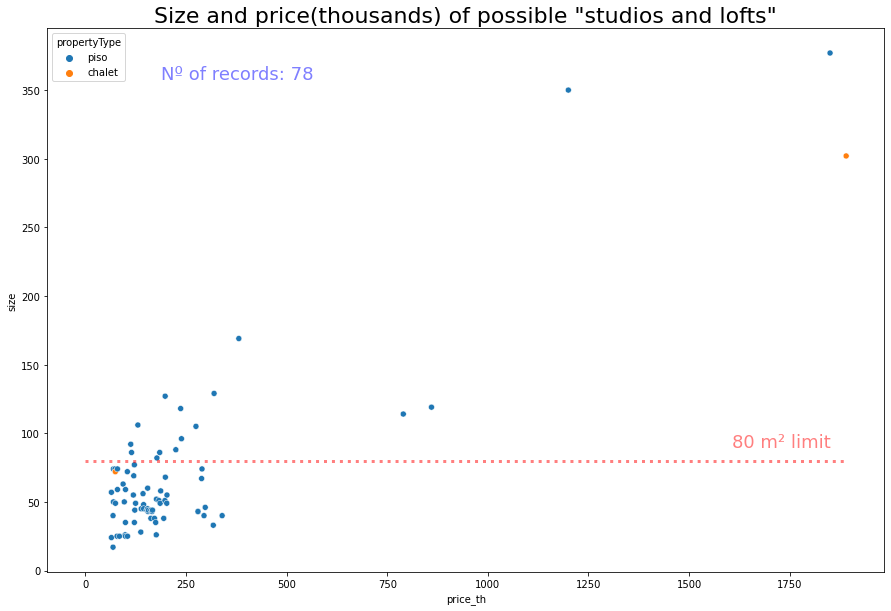

In [ ]:
possible_studio_loft_filter = ((piso_chalet_or_finca['bathNumber']<=1) & (piso_chalet_or_finca['roomNumber']==0))
possible_studio_loft = piso_chalet_or_finca[possible_studio_loft_filter].sort_values('price').copy()
possible_studio_loft['price_th'] = possible_studio_loft['price']/1000
max_size_limit = np.array([[0,possible_studio_loft['price_th'].max()],[80,80]])

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.set_title('Size and price(thousands) of possible "studios and lofts"', fontsize=22)
ax.plot(max_size_limit[0],max_size_limit[1],color='r', linestyle=':', linewidth=3, alpha=.5)
ax.text(possible_studio_loft['price_th'].max()*0.85,90,"80 m² limit", fontsize=18, color='r', alpha=.5)
ax.text(possible_studio_loft['price_th'].max()*0.10, possible_studio_loft['size'].max()*0.95,
        f"Nº of records: {len(possible_studio_loft)}", fontsize=18, color='b', alpha=.5)
sns.scatterplot(data=possible_studio_loft, x='price_th', y='size', hue='propertyType', ax=ax);

The red dotted line marks the 80m2 limit. It's a completely arbitrary size limit above which it seems weird to us that a property can be defined as a studio and should therefore be classified as a loft.

There are 2 possibilities to consider here:
* these records might be actual studios or lofts
* they can be normal houses or flats wrongly submitted without bedrooms/bathrooms

In [ ]:
possible_studio_loft['propertyType'].value_counts()

piso      76
chalet     2
Name: propertyType, dtype: int64

If the records are normal houses (chalets) or flats wrongly submitted, they must be dropped.

If we consider the remaining records as correct, we have to set a limit of size to split them into studios or lofts.

In [ ]:
possible_studio_loft[possible_studio_loft['propertyType']=='chalet'].T

,28979,34245
id,165200343,176186622
propertyType,chalet,chalet
title,"Casa o chalet en venta en Calle Teruel, 18 - 3? E",Casa adosada en venta
price,74788,1890000
size,72,302
hasParking,0,1
roomNumber,0,0
bathNumber,1,0
hasSwimmingPool,0,1
hasTerrace,0,1


These two properties are actual chalets that also have swimming pool. The bedrooms' and bathrooms' count must be an error so both records must be dropped.

In [ ]:
df = df[~df['id'].isin(possible_studio_loft[possible_studio_loft['propertyType']=='chalet']['id'].values)]
possible_studio_loft = possible_studio_loft[possible_studio_loft['propertyType']!='chalet']

Now that we removed the 2 chalets, we have to decide what to do with the rest of the records generically defined as "pisos" that have no bedroom and at best only 1 bathroom.

We decided to stick with our decision and split them based on simple size. Those having a size above 80 squared metres will be classified as lofts, the rest will be "estudios"

In [ ]:
possible_studio_loft.loc[possible_studio_loft['size']>80,'propertyType'] = 'loft'
possible_studio_loft.loc[possible_studio_loft['size']<=80,'propertyType'] = 'estudio'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df.update(possible_studio_loft)
df[(df['bathNumber']<=1) & (df['roomNumber']==0)].sample(20)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


,id,propertyType,title,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,...,isGoodCondition,isNeedsRenovating,isNewDevelopment,energyCertification,heatingType,floor,district,dataset,hasHeatingInfo,price_m2
10451,91706716,estudio,"estudio en venta en calle santiago alió, 9",190000.0,85.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,NO INFO,no info/no calefacción,1,Puente de Vallecas,idealista,0.0,2235.29
4708,1640429,estudio,"estudio en venta en calle puerto de arlabán, 70",58888.0,20.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,NO INFO,no info/no calefacción,0,Puente de Vallecas,idealista,0.0,2944.40
20405,100162999,estudio,estudio en venta en calle nicaragua,206000.0,31.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,NO INFO,no info/no calefacción,0,Chamartin,idealista,0.0,6645.16
29944,165005119,loft,Piso en venta en Calle Doctor Blanco Soler,185000.0,86.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,G,no info/no calefacción,6,Latina,fotocasa,0.0,2151.16
16839,98184975,estudio,"estudio en venta en calle de claudio coello, 71",380000.0,35.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,NO INFO,no info/no calefacción,2,Barrio de Salamanca,idealista,0.0,10857.14
3407,98477106,loft,piso en venta en maqueda,239000.0,96.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,E,no info/no calefacción,2,Latina,idealista,0.0,2489.58
11608,99805839,estudio,"estudio en venta en calle de marcenado, 25",198000.0,55.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,NO INFO,no info/no calefacción,0,Chamartin,idealista,0.0,3600.00
34717,165338046,estudio,Estudio en venta,99900.0,35.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,E,no info/no calefacción,0,Carabanchel,fotocasa,0.0,2854.29
14340,98115009,estudio,"estudio en venta en calle de toledo, 68",331750.0,32.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,NO INFO,no info/no calefacción,3,Centro,idealista,0.0,10367.19
10235,100118645,estudio,"estudio en venta en calle san cipriano, 29",197000.0,41.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,B,no info/no calefacción,2,Vicálvaro,idealista,0.0,4804.88


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,24777.0,566060.009646,758534.342860,11900.0,185000.00,320000.0,630000.00,21000000.0
size,24777.0,128.404327,1180.299202,5.0,64.00,90.0,133.00,185000.0
hasParking,24777.0,0.306171,0.460911,0.0,0.00,0.0,1.00,1.0
roomNumber,24777.0,2.717480,1.551796,0.0,2.00,3.0,3.00,109.0
bathNumber,24777.0,1.821649,1.160874,0.0,1.00,2.0,2.00,21.0
hasSwimmingPool,24777.0,0.173588,0.378763,0.0,0.00,0.0,0.00,1.0
hasTerrace,24777.0,0.400210,0.489951,0.0,0.00,0.0,1.00,1.0
hasGarden,24777.0,0.188966,0.391489,0.0,0.00,0.0,0.00,1.0
hasLift,24777.0,0.686685,0.463851,0.0,0.00,1.0,1.00,1.0
hasAirco,24777.0,0.547040,0.497792,0.0,0.00,1.0,1.00,1.0


Let's also remove the houses having no bathroom, which is impossible even for a studio

In [ ]:
df[df['bathNumber']==0].shape[0]

60

In [ ]:
df = df[df['bathNumber']>0]

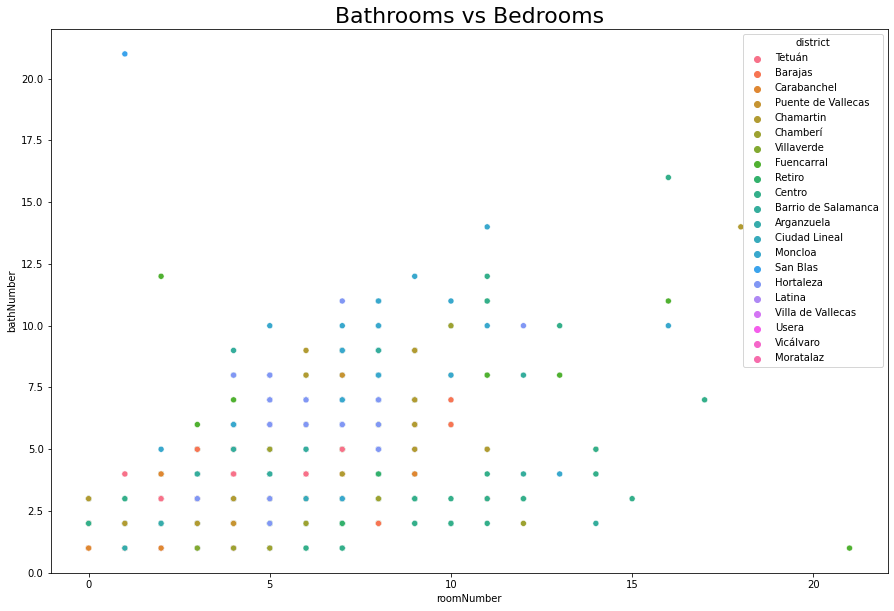

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.set_title('Bathrooms vs Bedrooms', fontsize=22)
sns.scatterplot(data=df, x='roomNumber', y='bathNumber', hue='district', ax=ax);

There are properties with one room and 20 bathrooms or 20+ rooms and 1 bathroom.

It has little importance whether such properties' data is correct, since they are outliers so we have to establish boundaries and remove such outliers.

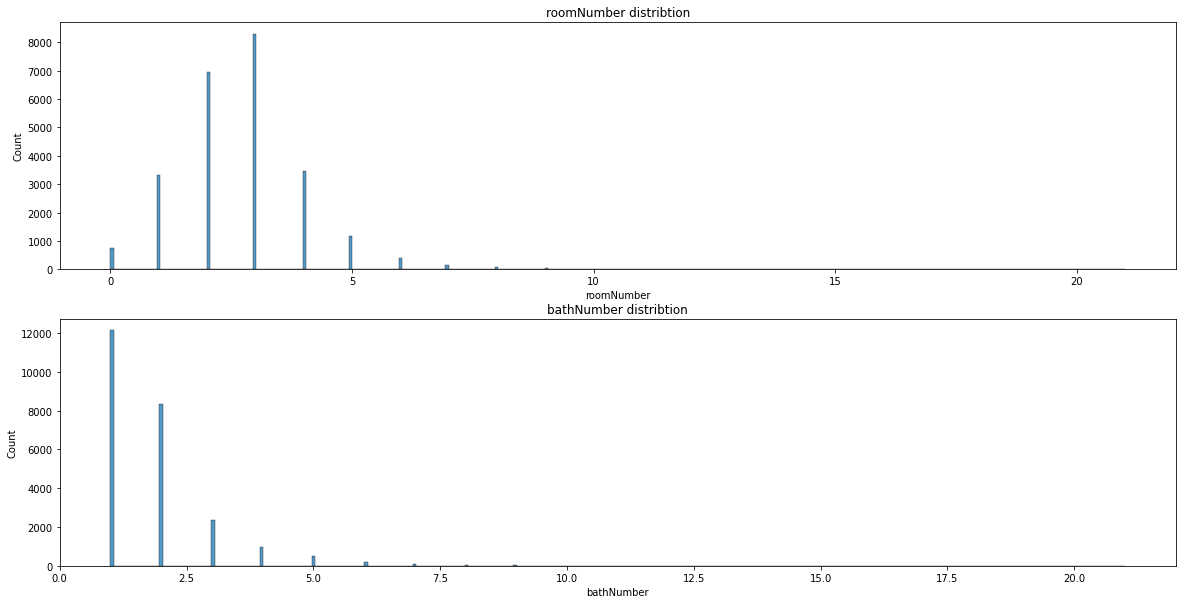

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(20,10))

axes[0].set_title('roomNumber distribtion')
sns.histplot(data=df, x='roomNumber',ax=axes[0])

axes[1].set_title('bathNumber distribtion')
sns.histplot(data=df, x='bathNumber',ax=axes[1]);


In [ ]:
df['room_bath_rate'] = df['roomNumber'].astype(float)/df['bathNumber'].astype(float)

We just created an indicator called "room_bath_rate". The idea behind this is that a normal property, so not a luxury or investors-aimed one, should have a reasonable proportion of rooms per bathrooms.

This indicator can be compared with the size of the property to have a better understanding of it

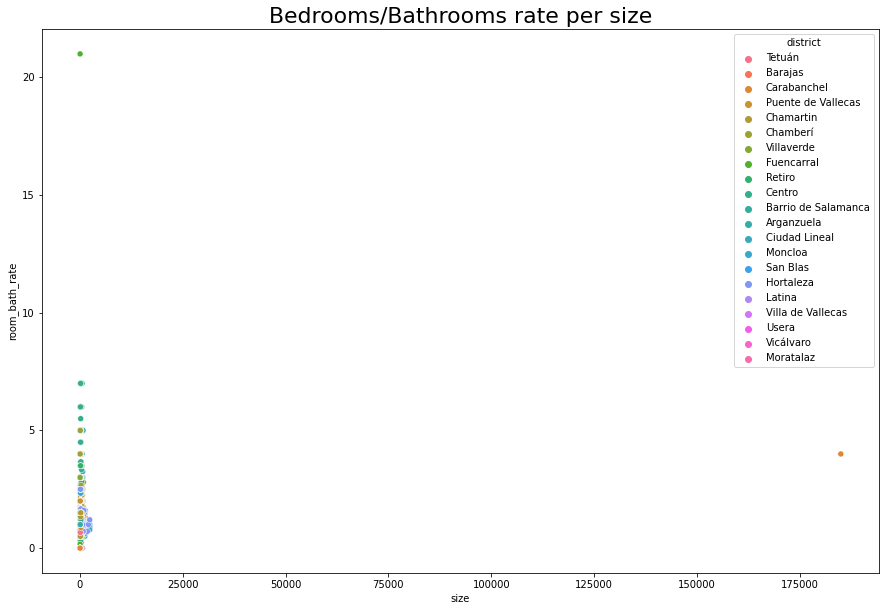

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.set_title('Bedrooms/Bathrooms rate per size', fontsize=22)
sns.scatterplot(data=df, x='size', y='room_bath_rate', hue='district', ax=ax);

The graph shows two obvious outlier that must be removed

In [ ]:
df = df[df['room_bath_rate'] < 20]
df = df[df['bathNumber'] < 20]
df = df[df['size'] < 175000]

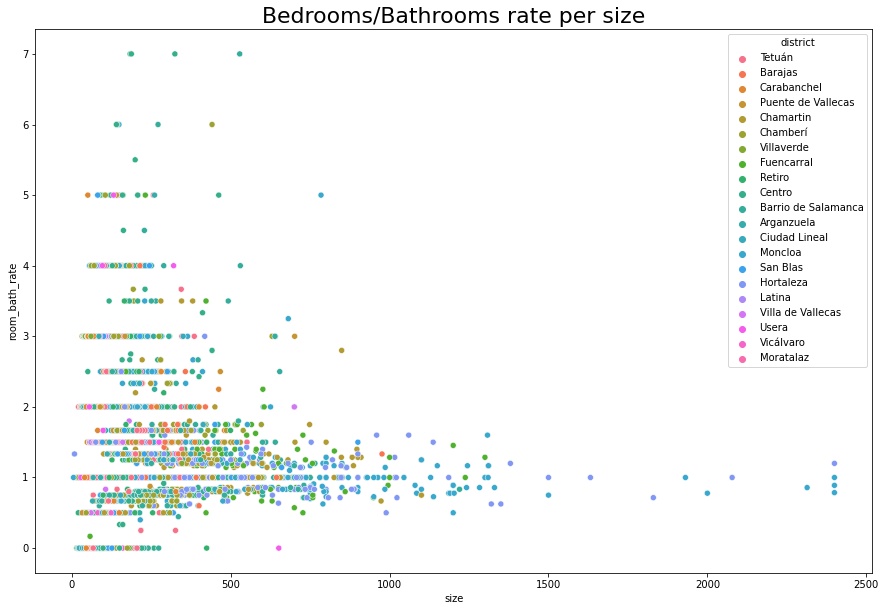

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.set_title('Bedrooms/Bathrooms rate per size', fontsize=22)
sns.scatterplot(data=df, x='size', y='room_bath_rate', hue='district', ax=ax);

In [ ]:
df['room_bath_rate'].describe()

count    24714.000000
mean         1.675485
std          0.818473
min          0.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          7.000000
Name: room_bath_rate, dtype: float64

In [ ]:
df[(df['room_bath_rate']>0) & (df['room_bath_rate']<=0.5)]

,id,propertyType,title,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,...,isNeedsRenovating,isNewDevelopment,energyCertification,heatingType,floor,district,dataset,hasHeatingInfo,price_m2,room_bath_rate
361,97894013,piso,piso en venta en calle del doctor sánchez,110000.0,54.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,NO INFO,no info/no calefacción,3,Puente de Vallecas,idealista,0.0,2037.04,0.5
492,97798708,atico,"ático en venta en avenida de valdemarín, 93",1273100.0,215.0,0.0,2.0,5.0,1.0,1.0,...,0.0,0.0,NO INFO,no info/no calefacción,2,Moncloa,idealista,0.0,5921.40,0.4
618,97532939,piso,piso en venta en concepción,270000.0,94.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,NO INFO,no info/no calefacción,0,Ciudad Lineal,idealista,0.0,2872.34,0.5
1272,96939899,piso,"piso en venta en calle de manzanares, 21",255000.0,74.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,E,no info/no calefacción,0,Arganzuela,idealista,0.0,3445.95,0.5
1346,98290502,piso,piso en venta en media legua,239000.0,100.0,1.0,1.0,2.0,0.0,0.0,...,0.0,0.0,NO INFO,no info/no calefacción,1,Moratalaz,idealista,0.0,2390.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36969,176353086,piso,Piso en venta,1800000.0,308.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,G,no info/no calefacción,0,Chamberí,fotocasa,0.0,5844.16,0.5
37040,163784585,piso,"Piso en venta en Calle de Raimundo Lulio, 10",240000.0,45.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,D,no info/no calefacción,3,Chamberí,fotocasa,0.0,5333.33,0.5
37380,163450130,duplex,Dúplex en venta,270000.0,102.0,1.0,1.0,2.0,0.0,1.0,...,0.0,0.0,G,electricidad,3,San Blas,fotocasa,1.0,2647.06,0.5
37386,165103143,piso,Piso en venta en Calle de Martín de Los Heros,458000.0,96.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,G,gas natural,8,Moncloa,fotocasa,1.0,4770.83,0.5


In [ ]:
df[df['room_bath_rate']>5.0]

,id,propertyType,title,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,...,isNeedsRenovating,isNewDevelopment,energyCertification,heatingType,floor,district,dataset,hasHeatingInfo,price_m2,room_bath_rate
2175,98203315,atico,ático en venta en sol,2500000.0,324.0,0.0,7.0,1.0,0.0,1.0,...,1.0,0.0,NO INFO,no info/no calefacción,6,Centro,idealista,0.0,7716.05,7.0
3572,98950097,piso,piso en venta en príncipe de vergara,1500000.0,271.0,0.0,6.0,1.0,0.0,1.0,...,1.0,0.0,NO INFO,no info/no calefacción,1,Barrio de Salamanca,idealista,0.0,5535.06,6.0
4044,95561219,piso,piso en venta en huertas-cortes,670000.0,141.0,0.0,6.0,1.0,0.0,0.0,...,1.0,0.0,E,no info/no calefacción,3,Centro,idealista,0.0,4751.77,6.0
4299,98270652,piso,piso en venta en calle de alcalá,4450000.0,528.0,0.0,14.0,2.0,0.0,0.0,...,1.0,0.0,E,no info/no calefacción,2,Barrio de Salamanca,idealista,0.0,8428.03,7.0
8326,98319963,piso,piso en venta en calle de luisa fernanda,975500.0,148.0,0.0,6.0,1.0,0.0,0.0,...,1.0,0.0,F,no info/no calefacción,1,Moncloa,idealista,0.0,6591.22,6.0
8573,97103232,piso,piso en venta en sol,745000.0,199.0,0.0,11.0,2.0,0.0,0.0,...,1.0,0.0,NO INFO,no info/no calefacción,3,Centro,idealista,0.0,3743.72,5.5
10582,97263181,piso,piso en venta en malasaña-universidad,750000.0,186.0,0.0,7.0,1.0,0.0,0.0,...,1.0,0.0,C,no info/no calefacción,2,Centro,idealista,0.0,4032.26,7.0
14000,97838246,piso,piso en venta en almagro,2650000.0,441.0,0.0,12.0,2.0,0.0,0.0,...,1.0,0.0,NO INFO,no info/no calefacción,1,Chamberí,idealista,0.0,6009.07,6.0
16706,96902703,piso,piso en venta en malasaña-universidad,650000.0,183.0,0.0,7.0,1.0,0.0,0.0,...,1.0,0.0,NO INFO,no info/no calefacción,2,Centro,idealista,0.0,3551.91,7.0
16932,99173073,piso,piso en venta en calle de ventura de la vega,690000.0,142.0,0.0,6.0,1.0,0.0,0.0,...,1.0,0.0,F,no info/no calefacción,4,Centro,idealista,0.0,4859.15,6.0


Properties having more bathrooms than bedrooms are not necessarily outliers as even a simple loft can have 0 bedrooms (meaning, bedrooms having no door/walls or fixed and phisical separations) but might have bathrooms.

It is different though when it comes to properties having a number of bedrooms that is more than 5 times the number of bathrooms. Such properties tend to be ideal for investments, as they can be easily rented to students and young professionals because of their characteristics. Such properties are out of the scope of this project and should be removed.

In [ ]:
print(df.shape)
df = df[df['room_bath_rate']<=5.0]
print(df.shape)

(24714, 24)
(24702, 24)


In [ ]:
df[(df['room_bath_rate']>0) & (df['room_bath_rate']<1)]

,id,propertyType,title,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,...,isNeedsRenovating,isNewDevelopment,energyCertification,heatingType,floor,district,dataset,hasHeatingInfo,price_m2,room_bath_rate
2,98255270,piso,piso en venta en avenida del general perón,995000.0,179.0,0.0,4.0,5.0,0.0,0.0,...,0.0,0.0,NO INFO,no info/no calefacción,1,Tetuán,idealista,0.0,5558.66,0.800000
48,96279125,chalet,chalet pareado en venta en aravaca,1199000.0,340.0,1.0,4.0,5.0,1.0,1.0,...,0.0,0.0,D,no info/no calefacción,0,Moncloa,idealista,0.0,3526.47,0.800000
248,98134065,piso,piso en venta en calle de alfonso xii,2980000.0,250.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,NO INFO,no info/no calefacción,4,Retiro,idealista,0.0,11920.00,0.750000
294,97094109,piso,piso en venta en calle de domenico scarlatti,925000.0,142.0,1.0,2.0,3.0,0.0,0.0,...,0.0,0.0,NO INFO,no info/no calefacción,6,Chamberí,idealista,0.0,6514.08,0.666667
332,98463773,atico,ático en venta en recoletos,2150000.0,200.0,1.0,3.0,4.0,0.0,1.0,...,0.0,0.0,NO INFO,no info/no calefacción,7,Barrio de Salamanca,idealista,0.0,10750.00,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37450,176379452,piso,Piso en venta en Calle del General Pardiñas,910000.0,118.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,G,gas natural,7,Barrio de Salamanca,fotocasa,1.0,7711.86,0.750000
37451,165404156,chalet,Casa o chalet en venta en Rd Avutarda,2800000.0,807.0,1.0,5.0,7.0,0.0,0.0,...,0.0,0.0,G,no info/no calefacción,0,Hortaleza,fotocasa,0.0,3469.64,0.714286
37491,165622670,piso,Piso en venta en San German,590000.0,115.0,0.0,2.0,3.0,0.0,0.0,...,0.0,0.0,G,gas natural,0,Tetuán,fotocasa,1.0,5130.43,0.666667
37496,165291733,chalet,Casa o chalet en venta,590000.0,115.0,0.0,2.0,3.0,0.0,0.0,...,0.0,0.0,G,gas natural,0,Tetuán,fotocasa,1.0,5130.43,0.666667


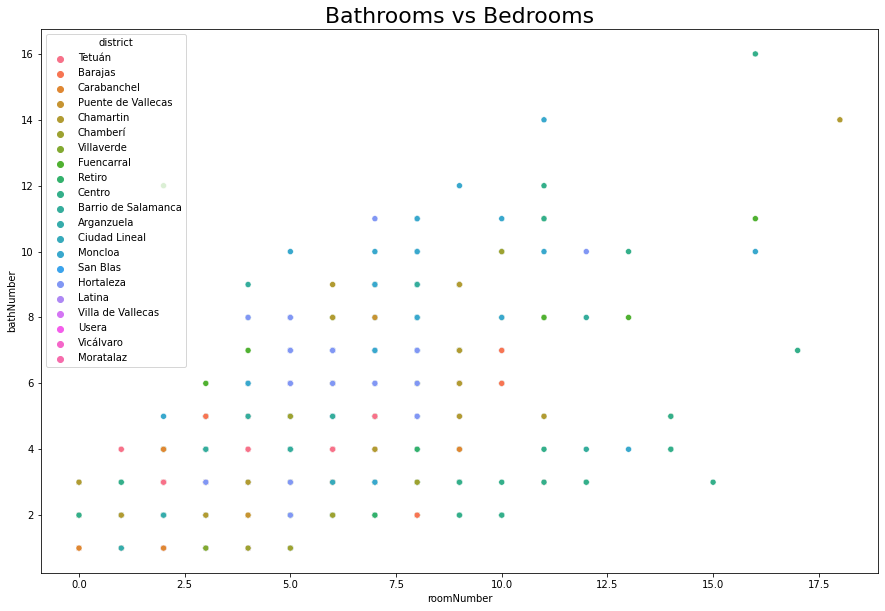

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.set_title('Bathrooms vs Bedrooms', fontsize=22)
sns.scatterplot(data=df, x='roomNumber', y='bathNumber', hue='district', ax=ax);

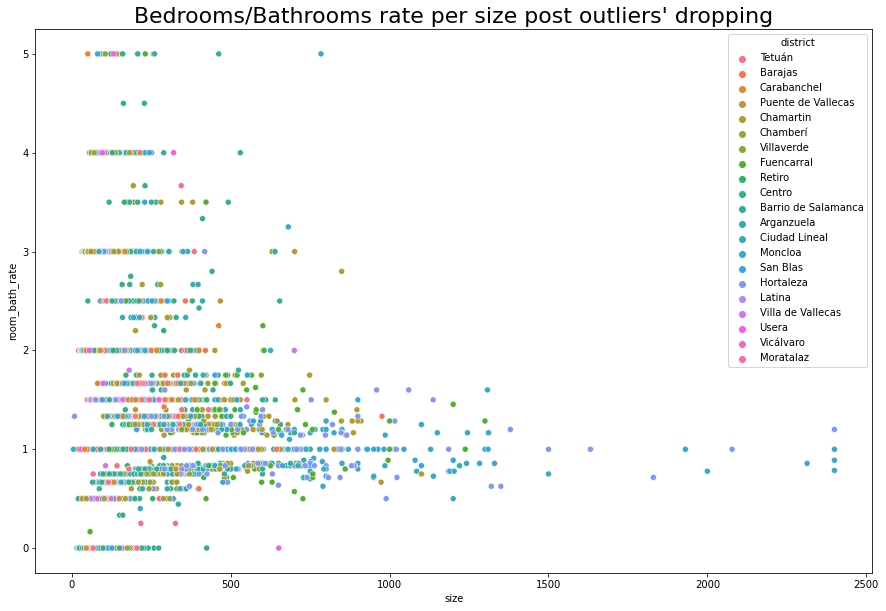

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.set_title('Bedrooms/Bathrooms rate per size post outliers\' dropping', fontsize=22)
sns.scatterplot(data=df, x='size', y='room_bath_rate', hue='district', ax=ax);

In [ ]:
df['size_time_baths'] = df['size'] / df['bathNumber']
df['size_time_baths'].describe()

count    24702.000000
mean        64.777702
std         25.229075
min          2.666667
25%         49.500000
50%         61.000000
75%         75.000000
max        701.000000
Name: size_time_baths, dtype: float64

In [ ]:
df.describe()

,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,hasGarden,hasLift,hasAirco,isGoodCondition,isNeedsRenovating,isNewDevelopment,hasHeatingInfo,price_m2,room_bath_rate,size_time_baths
count,2.470200e+04,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000
mean,5.662440e+05,120.950004,0.306939,2.714881,1.825642,0.173873,0.400939,0.189458,0.687637,0.548134,0.809287,0.148409,0.042102,0.088090,4261.994719,1.673202,64.777702
std,7.585947e+05,116.624933,0.461233,1.383345,1.152584,0.379008,0.490099,0.391880,0.463466,0.497688,0.392871,0.355512,0.200826,0.283432,2291.377872,0.812001,25.229075
min,1.190000e+04,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.610000,0.000000,2.666667
25%,1.850000e+05,64.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2618.240000,1.000000,49.500000
50%,3.200000e+05,90.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3817.175000,1.500000,61.000000
75%,6.300000e+05,132.750000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5292.680000,2.000000,75.000000
max,2.100000e+07,2400.000000,1.000000,18.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,110687.500000,5.000000,701.000000


Looking at the size distribution, the minimum value is "5" which is impossible for a house.

In [ ]:
df[df['size']<20].sort_values('size',ascending=True).head(10)

,id,propertyType,title,price,size,hasParking,roomNumber,bathNumber,hasSwimmingPool,hasTerrace,...,isNewDevelopment,energyCertification,heatingType,floor,district,dataset,hasHeatingInfo,price_m2,room_bath_rate,size_time_baths
37234,176330753,piso,Planta baja en venta en Calle de Ventura Rodrí...,20000.0,5.0,0.0,1.0,1.0,0.0,0.0,...,0.0,G,no info/no calefacción,0,Moncloa,fotocasa,0.0,4000.00,1.000000,5.000000
34691,165314418,piso,"Piso en venta en Prunos, 1",885500.0,8.0,0.0,4.0,3.0,0.0,0.0,...,0.0,G,no info/no calefacción,0,Hortaleza,fotocasa,0.0,110687.50,1.333333,2.666667
35469,165590186,piso,Piso en venta en Calle de Oviedo,32000.0,15.0,0.0,1.0,1.0,0.0,1.0,...,0.0,G,no info/no calefacción,3,Tetuán,fotocasa,0.0,2133.33,1.000000,15.000000
4272,90382551,estudio,"estudio en venta en calle del amparo, 67",90000.0,15.0,0.0,0.0,1.0,0.0,0.0,...,0.0,E,no info/no calefacción,0,Centro,idealista,0.0,6000.00,0.000000,15.000000
31147,164590809,piso,Piso en venta en Calle de Oviedo,33000.0,15.0,0.0,1.0,1.0,0.0,0.0,...,0.0,G,no info/no calefacción,3,Tetuán,fotocasa,0.0,2200.00,1.000000,15.000000
17418,98103321,estudio,estudio en venta en sanz raso,55000.0,15.0,0.0,0.0,1.0,0.0,0.0,...,0.0,F,no info/no calefacción,0,Puente de Vallecas,idealista,0.0,3666.67,0.000000,15.000000
25010,99080744,estudio,estudio en venta en calle del amparo,140000.0,16.0,0.0,0.0,1.0,0.0,0.0,...,0.0,G,no info/no calefacción,1,Centro,idealista,0.0,8750.00,0.000000,16.000000
2342,99911508,estudio,"estudio en venta en calle del norte, 5",95000.0,17.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NO INFO,no info/no calefacción,1,Centro,idealista,0.0,5588.24,0.000000,17.000000
2410,99854843,estudio,piso en venta en avenida del doctor federico r...,69000.0,17.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NO INFO,no info/no calefacción,-1,Tetuán,idealista,0.0,4058.82,0.000000,17.000000
1611,99986887,estudio,estudio en venta en montserrat,123000.0,18.0,0.0,0.0,1.0,0.0,0.0,...,0.0,E,no info/no calefacción,4,Centro,idealista,0.0,6833.33,0.000000,18.000000


In [ ]:
df = df[df['size']>20]

# **Saving datasets**

In [ ]:
df.to_csv(f'{datasets_folder}{os.sep}dataset-02-cleaning.csv',index=False)